# Parcial computacional sobre Test de Hipótesis

## Alumna: Maria Sol Vidal

In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
from matplotlib import pyplot as plt 
%matplotlib inline 

## Ejercicio **4.4** 
Si consideramos que al momento de este examen la patente más nueva en circulación es AD592MF, calculá cuanta suerte tuviste el día que armaste tu lista. Es decir, ¿cuál es la probabilidad de que hagas lo mismo y obtengas una estimación igual o
peor que la obtenida para la patente más nueva en circulación.

La estimación de n depende fuertemente de la patente más nueva observada $m^*$. Esto se debe a que nuestro prior $\Pi (n)$ está determinado por el  $m^*$ medido. Por lo tanto, para un $m^*$ medido más grande espero una mejor estimación de $n$, mientras que si mido un  $m^*$ más chico, obtendré una peor estimación de $n$. En este ítem, nos dicen que consideremos a $n$ como el natural asociado a la patente AD592MF, es decir, $n=2428510$. Mi pregunta es qué pasa si justo hubiese medido $m^*=n=2428510$. La estimación de $n$ en ese caso, ¿Es mejor o peor que la que obtuvimos con  $m^*=2412985$? 


Lo que voy a hacer primero es un "barrido grueso" de m's desde un m mucho menor que $m^*=2412985$ (100000) hasta $m=n=2428510$ para ver cómo es la relación entre el m que elijo para calcular el posterior $P(n\mid k=251,m)$ y la esperanza de $n$, es decir, el estimador bayesiano de $n$ (para ese valor de $m$ elegido). En particular, me voy a fijar para que m's obtengo una peor estimación de $n$ que tomando $m^*=2412985$ (el que medi). Luego la probabilidad de obtenener una estimación igual o peor de $n$  que la obtenida con $m^*=2412985$ va a ser la suma de las probabilidades de los $m$'s para los cuales se obtiene una estimación de $n$ igual o peor que con $m^*=2412985$, ya sea por defecto o exceso. Lo que espero es que para $m$'s menores a mi $m^*=2412985$, obtenga una peor estimación de n. 

In [81]:
#es un posterior aproximado, solo para ver la dependencia de E(n) con m 
def posterior(k,m,nc):
    p_n_m=[]
    n=np.arange(m,nc+1,1000)
    for i in n:
        p_n_m.append(p(m,k,i))
    A=sum(p_n_m) #normalizo
    p_n=np.array(p_n_m)
    p_n=p_n/A
    return n, p_n

In [83]:
e=[]
m=np.arange(100000,2428510+1,100000)
for i in m:
    n_prima,p_n_prima=posterior(251,i,2460000)
    e.append(sum((n_prima*p_n_prima)))

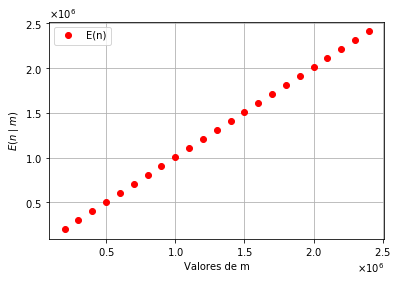

In [90]:
plt.plot(m,e,"ro",label="E(n)")


plt.ticklabel_format(style='sci', axis='Both', scilimits=(0,0),useMathText=True)
plt.grid(True)
plt.legend(loc = 'best')
plt.xlabel("Valores de m")
plt.ylabel(r"$E(n \mid m)$")
plt.show()

Como se puede ver, la relación entre el $m$ que elijo para calcular el posterior y la esperanza de $n$ (dado esa elección de $m$) es lineal con pendiente positiva. Por lo tanto, es verdad que para un $m$ menor que mi $m^*=2412985$ voy a obtener una peor estimación de $n$. Entonces, para calcular la probabilidad de obtener una estimación igual o peor de $n$ que la obtenida con mi $m^∗$=2412985, tengo que sumar las probabilidades de obtener m's menores que mi $m^*=2412985$. Ahora voy a ver en detalle que pasa para los $m>m^*=2412985$.

In [92]:
def posterior(k,m,nc):
    p_n_m=[]
    n=np.arange(m,nc+1,10) #en rigor deberia tener paso 1, pero con la cantidad de numeros intermedios no afecta ponerle paso 10
    for i in n:
        p_n_m.append(p(m,k,i))
    A=sum(p_n_m) #normalizo
    p_n=np.array(p_n_m)
    p_n=p_n/A
    return n, p_n

In [93]:
e=[]
m=np.arange(2412985,2428510+1,100)
for i in m:
    n_prima,p_n_prima=posterior(251,i,2460000)
    e.append(sum((n_prima*p_n_prima)))

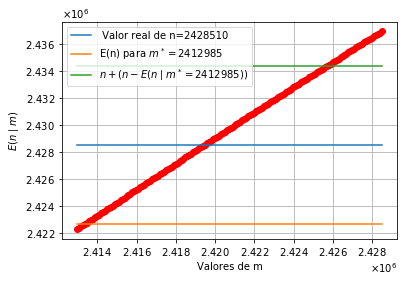

In [97]:
plt.plot(m,e,"ro")
plt.plot(m,[2428510]*len(e),label=" Valor real de n=2428510")
plt.plot(m,[2422675]*len(e),label=r"E(n) para $m^*=2412985$")
plt.plot(m,[2428510+5835]*len(e),label=r"$n+(n-E(n \mid m^*=2412985))$")

plt.ticklabel_format(style='sci', axis='Both', scilimits=(0,0),useMathText=True)
plt.grid(True)
plt.legend(loc = 'best')
plt.xlabel("Valores de m")
plt.ylabel(r"$E(n \mid m)$")
plt.show()

La linea verde es el valor real de $n=2428510$ más la distancia entre la esperanza de $n$ para mi $m^*=2412985$ y el valor real de $n$. Es decir, la linea verde está construida como:

In [68]:
dist=2428510- 2422675 # n - E(n) para mi m*
2428510+dist # n + dist 

2434345

Es decir, para los $m$'s que están "a la derecha" de la intersección de la curva roja y verde, obtengo una peor estimación de $n$ que con mi $m^*=2412985$ por exceso. Por lo tanto, a esos $m$ también los tengo que tener en cuenta para calcular la probabilidad de obtenener una estimación igual o peor de $n$ que la obtenida con mi $m^*=2412985$. Para eso, necesito ver la intersección entre la curva roja (E(n) en función de m) con la línea verde, para lo cual voy a fittear a la linea roja por una función lineal. 

In [98]:
from scipy.optimize import curve_fit
f = lambda x, A, B: A * x + B  

popt, pcov = curve_fit(f, m, e ) 
popt

array([9.45116438e-01, 1.41813399e+05])

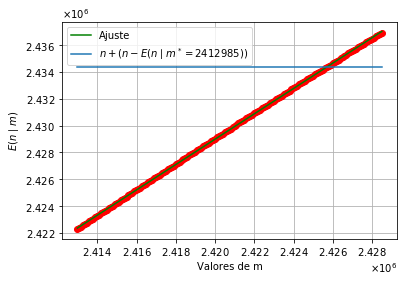

In [99]:
plt.plot(m,e,"ro")
t = np.linspace(min(m), max(m), 1000) 
plt.plot(t, f(t, *popt), 'g-', label = 'Ajuste') 
plt.plot(m,[2428510+5835]*len(e),label=r"$n+(n-E(n \mid m^*=2412985))$")

plt.ticklabel_format(style='sci', axis='Both', scilimits=(0,0),useMathText=True)
plt.grid(True)
plt.legend(loc = 'best')
plt.xlabel("Valores de m")
plt.ylabel(r"$E(n \mid m)$")
plt.show()

Calculo el $m$ donde ocurre la intersección entre $E(n \mid m)$ y la línea verde:

In [69]:
(2434345-popt[1])/popt[0]

2425701.3996427977

Es decir, que para $m\geq 2425701$ ($m\leq n=2428510$ , pues estoy asumiendo que ese es el valor real de $n$) obtengo una peor estimación de $n$ que con mi $m^*=2412985$. Dicho todo esto, en conclusión, la probabilidad ($p$) de obtener una peor o igual estimación de $n$ que con mi $ m^*=  2412985$ la calculo como:


$$p=P(251\leq m <  m^*=  2412985 \mid k= 251,n=2428510)+ P(2425701\leq m \leq n=  2428510 \mid k= 251,n=2428510)$$


Computacionalmente voy a calcular $p$ como (1 menos el complemento de $p$), ya que demanda menos costo computacional.

In [101]:
def p(m,k,n):   #probabilidad de m
    coc=[]
    for i in range(1,k):
        coc.append((m-i)/(n-i))
    coc=np.array(coc)
    return (np.prod(coc)*k)/n

In [106]:
m_comp=np.arange(2412984,2425701,1)
proba=[]
for i in m_comp:
    proba.append(p(i,251,2428510))

In [110]:
1-sum(proba)

0.45207460733823

Rta: la probabilidad de obtener una peor o igual estimación de  $n$ que con mi  $m^∗=2412985$ es $\sim 0.45$.  